<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 1
#### Tomas A. Albanesi


### Consigna

<img src="./img/TS1_ImgConsigna_Albanesi.png" width="800" /> 

### Punto 1



#### Resolucion analitica

In [21]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 1
from IPython.display import IFrame
IFrame("./doc/TS1_AnaliticoPunto1_Albanesi.pdf", width=1000, height=1000)

In [2]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 1
# Agregado el 14/04/2023
from IPython.display import IFrame
IFrame("./doc/TS1_AnaliticoPunto1Grafico_Albanesi.pdf", width=1000, height=1000)

#### Resolucion simbolica (con SymPy)

In [2]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

# Defino los simbolos a utilizar
V1, V2, Vx = sp.symbols("V1, V2, Vx")
R1, R2, R3, C = sp.symbols("R1, R2, R3, C")

# Resuelvo el sistema de ecuaciones con la funcion solve()
syseq = sp.solve([ 
                (Vx-V2)/R2 + (Vx-V1)/R1, 
                (V1-Vx)*s*C - Vx/R3
                ],
                [V1, V2])

# Creo la funcion de transferencia
transf_func = syseq[V2]/syseq[V1]

# Obtengo numerador y denominador 
num, den = sp.fraction(sp.simplify(sp.expand(transf_func)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

# Obtengo el coeficiente principal de numerador y denominador (seria sacar el factor comun del num, y luego el den)
k = num.LC() / den.LC()

# Divido numerador y denominador por cada uno de los coeficiente principales
num = num.monic()
den = den.monic()

# Obtengo todos los coeficientes del denominador
den_coeffs = den.all_coeffs()
# Defino a w0 con el coeficiente del denominador
w0 = den_coeffs[-1]

# La funcion de transferencia final es la multiplicacion de la constante k con el num/den
transf_func_final = sp.Mul(k,num/den, evaluate=False)

# Muestro los resultados
display(transf_func_final)
display(Math( r' \omega_o = ' + sp.latex(w0) ))

1*((s - R2/(C*R1*R3))/(s + 1/(C*R3)))

<IPython.core.display.Math object>

### Punto 2

Observando rapidamente la transferencia encontrada en el dominio de Laplace:
    
\begin{equation}
\frac{V_2(s)}{V_1(s)} = \frac{s - \frac{R_2}{R_1 R_3 C}}{s + \frac{1}{R_3 C}}
\end{equation}

Podemos observar que cuando $\omega \to \infty$ nos queda el cociente de los coeficientes de mayor grado del numerador y denominador, es decir, nos da como resultado 1.
Luego, cuando $\omega \to 0$ nos queda el cociente de los terminos independientes, es decir, $\frac{\frac{-R_2}{R_1 R_3 C}}{\frac{1}{R_3 C}}$, da como resultado $\frac{-R_2}{R_1}$, y en el caso, por ejemplo, de que $R_2 = R_1$, tambien nos otorgara como respuesta un 1.

Por lo tanto, se puede concluir que este filtro es un <b> FILTRO PASA TODO </b>.

### Punto 3

#### Resolucion analitica

In [9]:
# Incorporacion y visualizacion de PDF con la resolucion analitica del punto 3
from IPython.display import IFrame
IFrame("./doc/TS1_AnaliticoPunto3_Albanesi.pdf", width=1000, height=1000)

#### Resolucion simbolica (con SymPy)

In [3]:
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

V1, V2, Vx = sp.symbols("V1, V2, Vx")
R1, R2, R3, C, R = sp.symbols("R1, R2, R3, C, R")

syseq = sp.solve([ 
                (Vx-V2)/R2 + (Vx-V1)/R1, 
                (V1-Vx)*s*C - Vx/R3
                ],
                [V1, V2])

transf_func = syseq[V2]/syseq[V1]

transf_func = transf_func.subs(R1, 1)
transf_func = transf_func.subs(R2, 1)
transf_func = transf_func.subs(R3, 1)
transf_func = transf_func.subs(C, 1)

num, den = sp.fraction(sp.simplify(sp.expand(transf_func)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
w0 = den_coeffs[-1]

transf_func_final = sp.Mul(k,num/den, evaluate=False)

display(transf_func_final)
display(Math( r' \omega_o = ' + sp.latex(w0) ))

1*((s - 1)/(s + 1))

<IPython.core.display.Math object>

### Punto 4

##### Importacion de librerias

In [3]:
# Importacion de librerias a utilizar
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import numpy as np
import matplotlib.pyplot as plt

##### Inicializacion de graficos

In [3]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

##### Codigo principal de simulacion (utilizando pytc2)

En esta parte del codigo realizamos la definicion de los valores de los componentes, hallamos la funcion transferencia mediante el numerador y denominador para finalmente graficar el modulo y fase mediante Bode ademas del diagrama de polos y ceros.

En esta parte los graficos de modulo y fase se muestran "fuera de escala" ya que utilizando la funcion bodePlot de pytc2 se grafica con demasiado zoom en los ejes y por lo tanto, la curva se distorsiona. En el apartado siguiente a esta codigo se grafica de forma "manual" con matplotlib para poder regular el zoom manualmente.

(3,
 <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>)

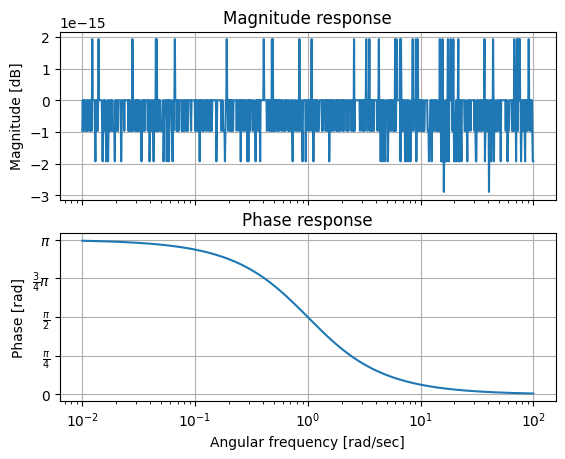

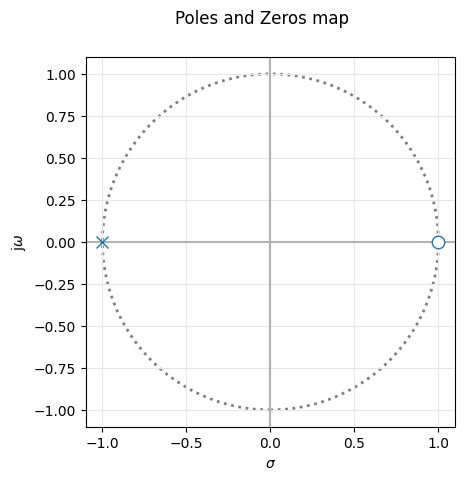

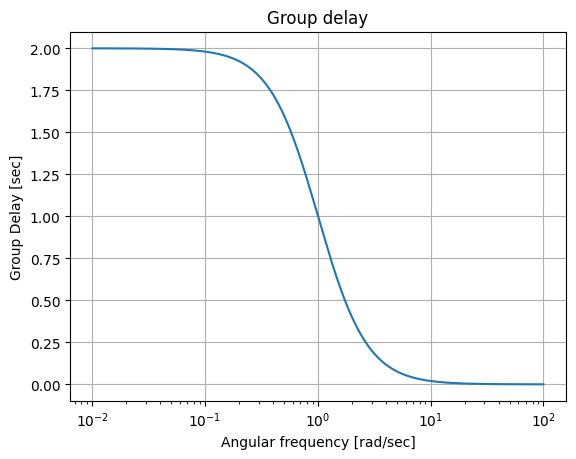

In [5]:
# Definicion de la funcion transferencia
my_tf = TransferFunction( [1, -1], [1, 1] )

# Grafico de bode
bodePlot(my_tf, fig_id=1)
    
# Grafico de polos y ceros
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# Grafico temporal delay    
GroupDelay(my_tf, fig_id=3)

##### Codigo principal de simulacion (utilizando puramente matplotlib)

En esta parte del codigo realizamos la definicion de los valores de los componentes, hallamos la funcion transferencia mediante el numerador y denominador para finalmente graficar el modulo y fase mediante Bode ademas del diagrama de polos y ceros.

Poles: [-1.]
Zeros: [1.]


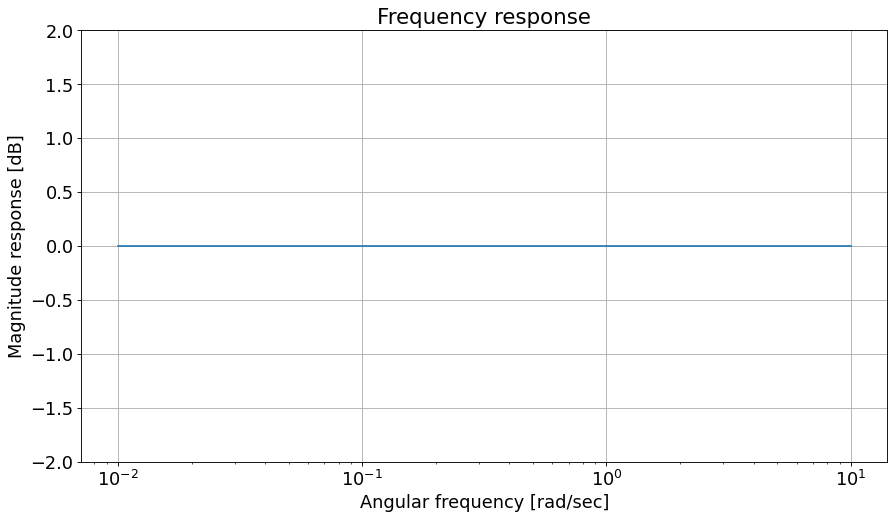

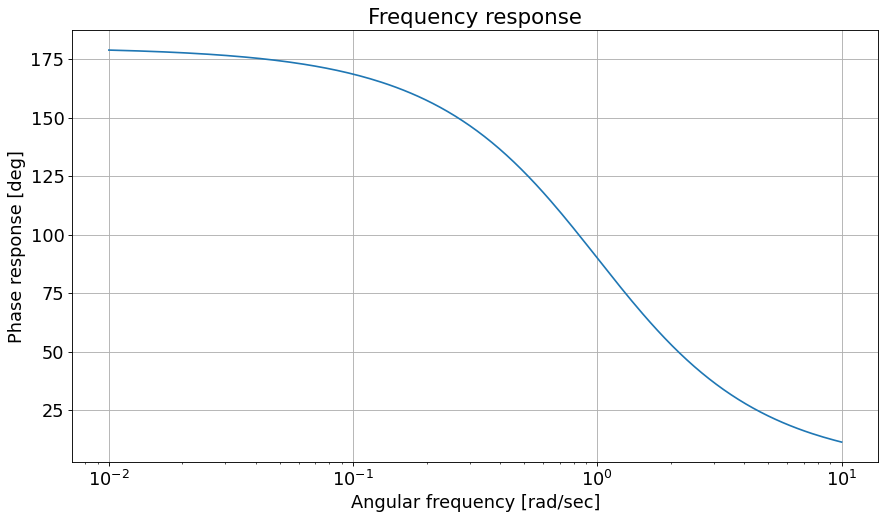

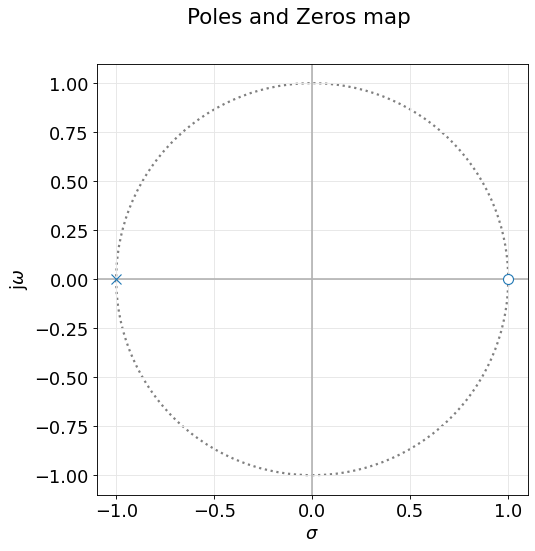

In [18]:
# Seteo la frecuencia normalizada
w0 = 1

# Defino numerador y denominador
num = [1,-w0]
den = [1,w0]  

# Defino el filtro mediante la TransferFunction
myFilter = TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)

# Utilizo la funcion bode para obtener la frecuencia, magnitud y fase con un n de 200
w, mag, phase = myFilter.bode(n=200)

# Grafico de modulo
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
# Grafico de fase
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
   
# Grafico los polos y ceros 
pzmap(myFilter)

# Muestro los graficos
plt.show()

### Punto 5

#### Calculo analitico

En la transferencia obtenida:

\begin{equation}
\frac{V_2(s)}{V_1(s)} = \frac{s - \frac{R_2}{R_1 R_3 C}}{s + \frac{1}{R_3 C}}
\end{equation}

Reemplazamos los valores en la transferencia:

$R_1 = 1K \Omega$

$R_2 = 1K \Omega$

$R_3 = 1K \Omega$

$C = 1 \mu F$

\begin{equation}
\frac{V_2(s)}{V_1(s)} = \frac{s - \frac{1x10^{3}}{1x10^{3} 1x10^{3} 1x10^{-6}}}{s + \frac{1}{1x10^{3} 1x10^{-6}}}
\end{equation}

Quedando de la siguiente forma:

\begin{equation}
\frac{V_2(s)}{V_1(s)} = \frac{s - 1000}{s + 1000}
\end{equation}


#### Simulacion en Python

Poles: [-1000.]
Zeros: [1000.]


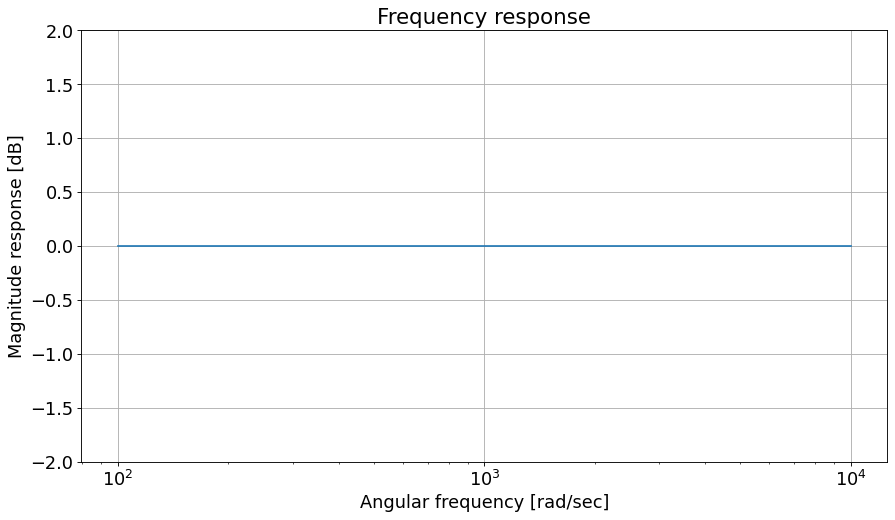

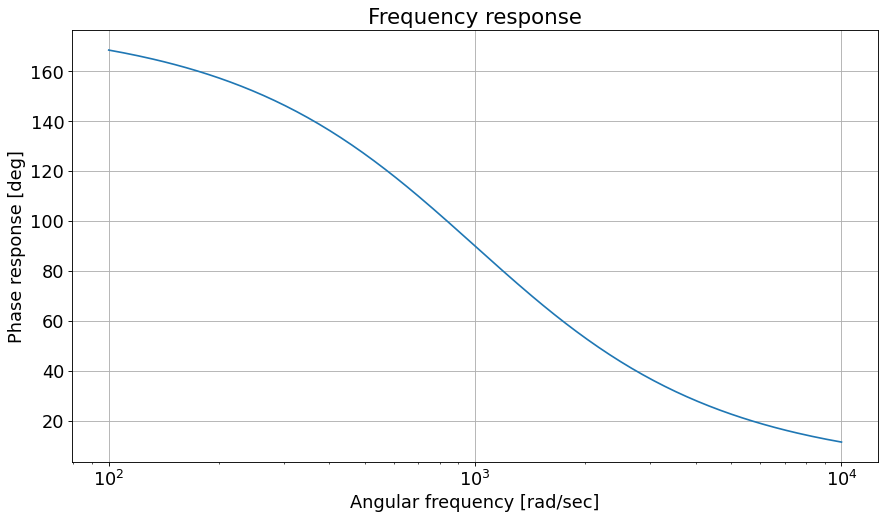

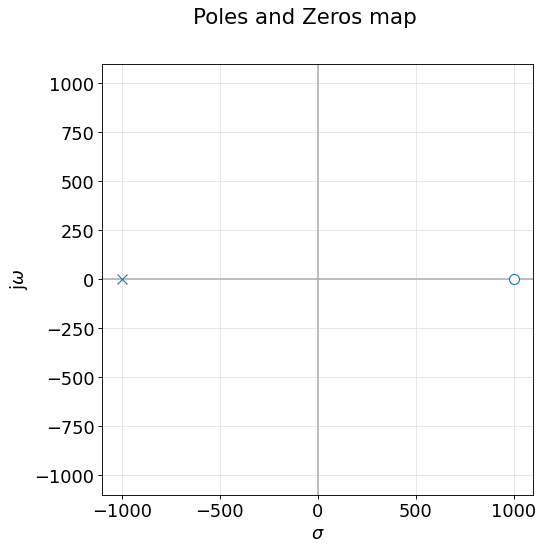

In [19]:
# Seteo la frecuencia normalizada
w0 = 1000

# Defino numerador y denominador
num = [1,-w0]
den = [1,w0]  

# Defino el filtro mediante la TransferFunction
myFilter = TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)

# Utilizo la funcion bode para obtener la frecuencia, magnitud y fase con un n de 200
w, mag, phase = myFilter.bode(n=200)

# Grafico de modulo
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
# Grafico de fase
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
   
# Grafico los polos y ceros 
pzmap(myFilter)

# Muestro los graficos
plt.show()

#### Circuito en LTSpice

<img src="./img/TS1_ImgCircuitoPunto5_Albanesi.png" width="800" /> 

#### Formas de onda LTSpice

<img src="./img/TS1_ImgWaveformsPunto5_Albanesi.png" width="800" /> 

### Punto 6

Este circuito modifica la respuesta en fase respecto de la frecuencia, manteniendo siempre la ganancia. Se puede utilizar para corregir la fase en sistemas de comunicacion, también se podría utilizar para generar una demora en la señal, sin modificar su amplitud.

### Conclusiones

Como conclusion se puede que este tipo de circuito, en el caso de que $R_1 = R_2$ se comporta como un filtro pasa todo, y que ademas, tanto los calculos teoricos, como la simulacion con Python, SymPy y LTSpice coinciden.

En particular, de esta tarea semanal me llevo el aprendizaje de investigar como funciona y como utilizar el modulo SymPy para realizar resoluciones simbolicas.

Ademas, en particular en el punto 4 realice dos veces la simulacion y graficos en Python, ya que solamente utilizando la funcion bodePlot no podia ajustar los ejes y, ya que tenian demasiado "zoom" y por lo tanto la curva se distorsionaba. Luego, lo grafique utilizando solamente pyplot y en este caso se represento de forma correcta.